**HMM**


In [1]:
import nltk
from nltk.corpus import indian
import string

In [2]:
nltk.download("punkt")
nltk.download("indian")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading indian: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:

taggedSet = "hindi.pos"
wordSet = indian.sents(taggedSet)
count = 0
for sen in wordSet:
    FOR I IN SEYTWORD(2)
    count = count + 1
    sen = "".join(
        [
            " " + i if not i.startswith("'") and i not in string.punctuation else i
            for i in sen
        ]
    ).strip()
    print(count, sen, "sentences")
print("Total sentences in the tagged file are", count)

data = indian.tagged_sents(taggedSet)
print("data is : ",end=" ")
print(data)


LookupError: 
**********************************************************************
  Resource [93mindian[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('indian')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/indian[0m

  Searched in:
    - 'C:\\Users\\Akshara/nltk_data'
    - 'c:\\Users\\Akshara\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\Akshara\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\Akshara\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Akshara\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:


from sklearn.model_selection import train_test_split
tagged_sentences = data
print(tagged_sentences)
traindataset , testdataset = train_test_split(tagged_sentences, shuffle=True, test_size=0.2)

HmmModel = nltk.HiddenMarkovModelTagger.train(traindataset)

correct_labels = [tag for sentences in testdataset for word, tag in sentences]

predicted_labels=[]
for sentences in testdataset:
    predicted_labels += [tag for _, tag in HmmModel.tag([word for word, _ in sentences])]

from sklearn.metrics import classification_report
print (classification_report(correct_labels, predicted_labels))

[[('पूर्ण', 'JJ'), ('प्रतिबंध', 'NN'), ('हटाओ', 'VFM'), (':', 'SYM'), ('इराक', 'NNP')], [('संयुक्त', 'NNC'), ('राष्ट्र', 'NN'), ('।', 'SYM')], ...]
              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
          CC       0.98      0.97      0.98        66
        INTF       0.00      0.00      0.00         3
          JJ       0.85      0.51      0.64        67
         JVB       0.52      0.70      0.60        20
         NEG       0.59      1.00      0.74        10
        NLOC       1.00      0.50      0.67         6
          NN       0.87      0.78      0.82       355
         NNC       0.64      0.59      0.61        58
         NNP       0.85      0.78      0.82       171
        NNPC       0.71      0.53      0.61        60
         NVB       0.45      0.67      0.54        36
        PREP       0.96      0.97      0.96       408
         PRP       0.84      0.82      0.83        72
        PUNC       0.87      0.89      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**SVM**


In [ ]:
import nltk
import random
from nltk.corpus import indian
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


tagged_sents = indian.tagged_sents('hindi.pos')


def extract_features(sentence, index):
    word = sentence[index][0]
    features = {
        'word': word,
        'prev_word': sentence[index - 1][0] if index > 0 else '',
        'next_word': sentence[index + 1][0] if index < len(sentence) - 1 else ''
    }
    return features


data = []
for sent in tagged_sents:
    for i in range(len(sent)):
        features = extract_features(sent, i)
        data.append((features, sent[i][1]))


random.shuffle(data)
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]


encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train = encoder.fit_transform([list(features.values()) for features, _ in train_data])
X_test = encoder.transform([list(features.values()) for features, _ in test_data])


y_train = [tag for _, tag in train_data]
y_test = [tag for _, tag in test_data]


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 84.70%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
          CC       0.98      0.95      0.97        66
        INTF       1.00      0.44      0.62         9
          JJ       0.64      0.65      0.64        72
         JVB       0.75      0.55      0.63        33
         NEG       0.90      0.82      0.86        11
        NLOC       1.00      0.62      0.77         8
          NN       0.72      0.91      0.80       360
         NNC       0.61      0.49      0.54        51
         NNP       0.89      0.82      0.85       152
        NNPC       0.73      0.52      0.60        62
         NVB       0.61      0.51      0.56        39
        PREP       0.98      0.99      0.99       380
         PRP       0.99      0.86      0.92        80
        PUNC       0.94      0.99      0.96       110
          QF       1.00      0.50      0.67         4
       QFNUM       0.92      0.85      0.88        80
          QW       0.00    

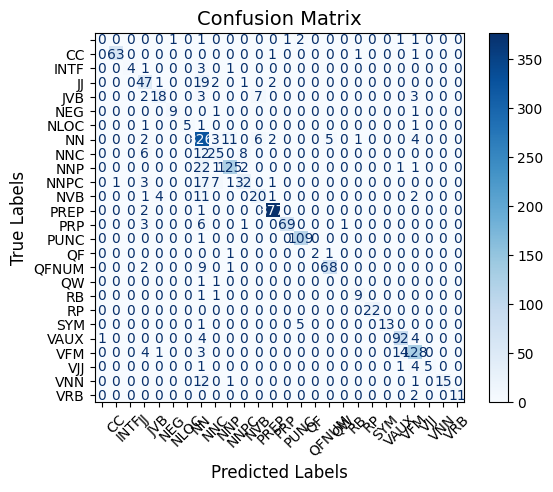

In [ ]:
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.xticks(rotation=45)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()


